In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


In [3]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**ETA**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

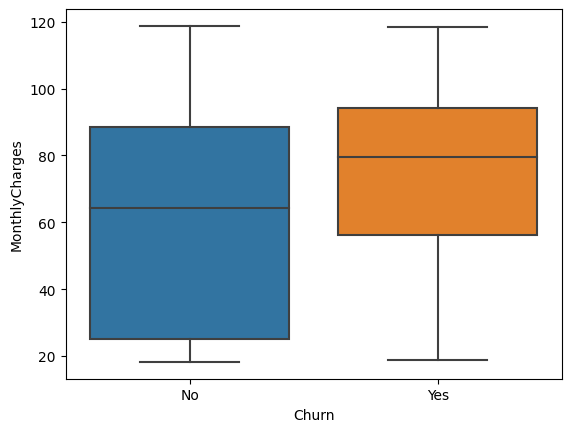

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

This mean that the customer agree  to stay when monthly charge higher

<Axes: xlabel='Churn'>

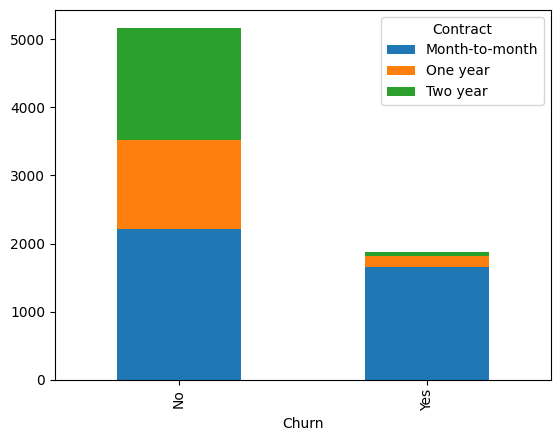

In [9]:
pd.crosstab(df['Churn'], df['Contract']).plot(kind='bar', stacked=True)

Customer tending to stay with month-to-month contract

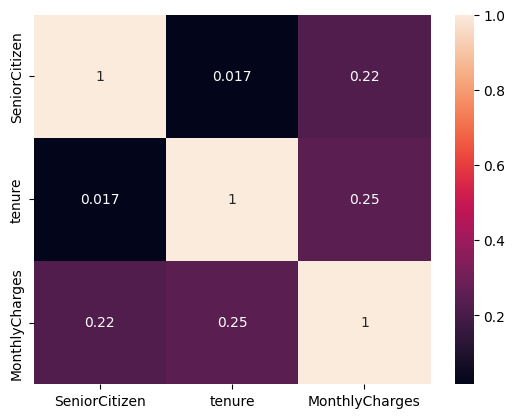

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True), 
cmap='coolwarm'

**Preprocess Data**

In [11]:
label_encoder = LabelEncoder()
#Encode Gender using Label Encoder
df['gender'] = label_encoder.fit_transform(df['gender'])
#Encode Internet service using OneHot encoder
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines'], drop_first=True)

# Convert any bool columns to int (True → 1, False → 0)
df = df.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'PaperlessBilling', 'Churn', 'OnlineBackup'
]

df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'No internet service':0})


/tmp/ipykernel_13/752636711.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'No internet service':0})


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [13]:
features = [
    'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling', 'gender',
    'SeniorCitizen', 'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year',
    'MultipleLines_No phone service', 'MultipleLines_Yes'
]


In [14]:
X = df[features]
y = df['Churn']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#feature scale to ensure stability
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
#n_estimators is an interger decide how many decision trees
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = (x_train, y_train)

In [18]:
y_pred = model.predict(x_test)

In [19]:
con_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [20]:
print(con_matrix)
print(class_report)
print(acc)

[[909 127]
 [189 184]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409

0.7757274662881476


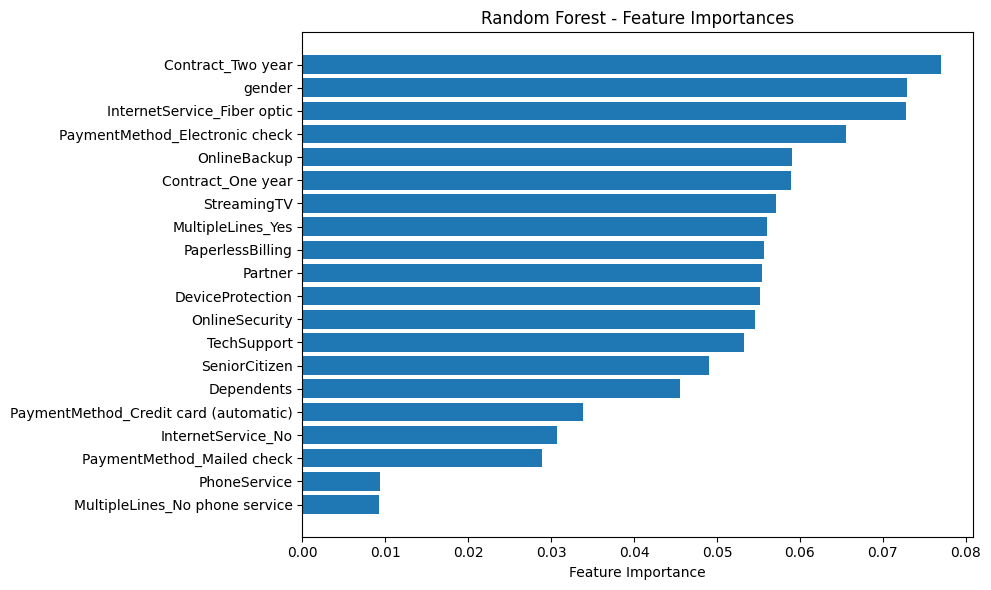

In [21]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Use correct feature names
feature_names = X.columns
names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices][::-1])
plt.yticks(range(len(indices)), names[::-1])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)


[[919 117]
 [162 211]]               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409
 0.8019872249822569


In [23]:
from sklearn.svm import SVC

# Build and train the Logistic Regression model
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)


[[919 117]
 [162 211]]               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409
 0.8019872249822569


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the Logistic Regression model
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(x_train, y_train)

# Make predictions
y_pred_kn = kn_model.predict(x_test)

# Evaluate the model
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)
class_report_kn = classification_report(y_test, y_pred_kn)
accuracy_kn = accuracy_score(y_test, y_pred_kn)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)


[[919 117]
 [162 211]]               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409
 0.8019872249822569
